**Distribution example**

Let's use a sample dataset from scikit-learn (sklearn) and perform the distribution fitting with explanation for each step.

In [2]:
#import library packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import load_iris

In [135]:
#Load the Iris dataset
iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils._bunch.Bunch'>


In [27]:
# Creating a DataFrame from the iris dataset
import pandas as pd
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
# Adding the target variable ('species') to the DataFrame
iris_df['species'] = iris_data.target_names[iris_data.target]

In [30]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [45]:
# Create a dictionary to map old column names to new column names
new_column_names = {
    'sepal length (cm)': 'sepallength',
    'sepal width (cm)': 'sepalwidth',
    'petal length (cm)': 'petallength',
    'petal width (cm)': 'petalwidth'
    # Add more mappings for other columns if needed
}

# Rename all columns using the dictionary
iris_df.rename(columns=new_column_names, inplace=True)
iris_df

,sepallength,sepalwidth,petallength,petalwidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


##Descriptive statistics

In [46]:
# Grouping by 'species' column and calculating the mean of each numeric column for each species
grouped_iris = iris_df.groupby('species').median()

print("\nMean measurements for each species:")
grouped_iris



Mean measurements for each species:


,sepallength,sepalwidth,petallength,petalwidth
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


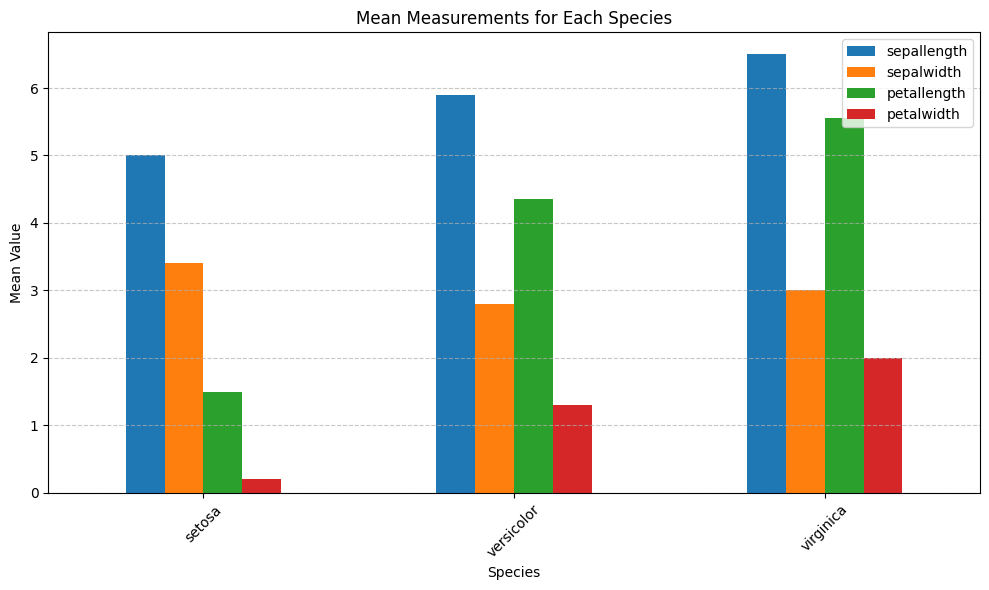

In [47]:
# Plotting the bar plot
grouped_iris.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Measurements for Each Species')
plt.xlabel('Species')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [48]:
import pandas as pd

print('Minimum value of', iris_df[['sepallength']].min())

print('Maximum value of', iris_df[['sepallength']].max())

print('Mean of', iris_df[['sepallength']].mean())

print('Median of', iris_df[['sepallength']].median())

print('Standard deviation of', iris_df[['sepallength']].std())

print('Summary Statistics of', iris_df[['sepallength']].describe())

print('Summary Statistics: All')
iris_df.describe()

Minimum value of sepallength    4.3
dtype: float64
Maximum value of sepallength    7.9
dtype: float64
Mean of sepallength    5.843333
dtype: float64
Median of sepallength    5.8
dtype: float64
Standard deviation of sepallength    0.828066
dtype: float64
Summary Statistics of        sepallength
count   150.000000
mean      5.843333
std       0.828066
min       4.300000
25%       5.100000
50%       5.800000
75%       6.400000
max       7.900000
Summary Statistics: All


,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [50]:
print('Mean Sepal & Petal Length by Species:')
iris_df.groupby('species')[['sepallength', 'petallength']].mean()

print('Summary Statistics of Sepal Length by Species:')
iris_df.groupby('species')[['sepallength']].describe()

print('Number of missing values of Sepal Length = ', sum(iris_df.sepallength.isnull()))

print('Number of non-missing values of Sepal Length = ', sum(iris_df.sepallength.notnull()))

print('Counts for different Species:')
iris_df.species.value_counts()


Mean Sepal & Petal Length by Species:
Summary Statistics of Sepal Length by Species:
Number of missing values of Sepal Length =  0
Number of non-missing values of Sepal Length =  150
Counts for different Species:


setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

**Kurtosis:**

Kurtosis measures the tailedness or peakedness of a probability distribution.
By computing kurtosis for the numeric columns in the Iris dataset, we can assess the degree of outliers or extreme values present in each feature's distribution. High kurtosis indicates heavy tails, while low kurtosis indicates light tails.
This measure helps in understanding the distributional characteristics of the dataset, which can aid in choosing appropriate statistical models and identifying potential data quality issues.

Kurtosis:
sepallength: -0.5735679489249765
sepalwidth: 0.18097631752246768
petallength: -1.3955358863990055
petalwidth: -1.336067405231553


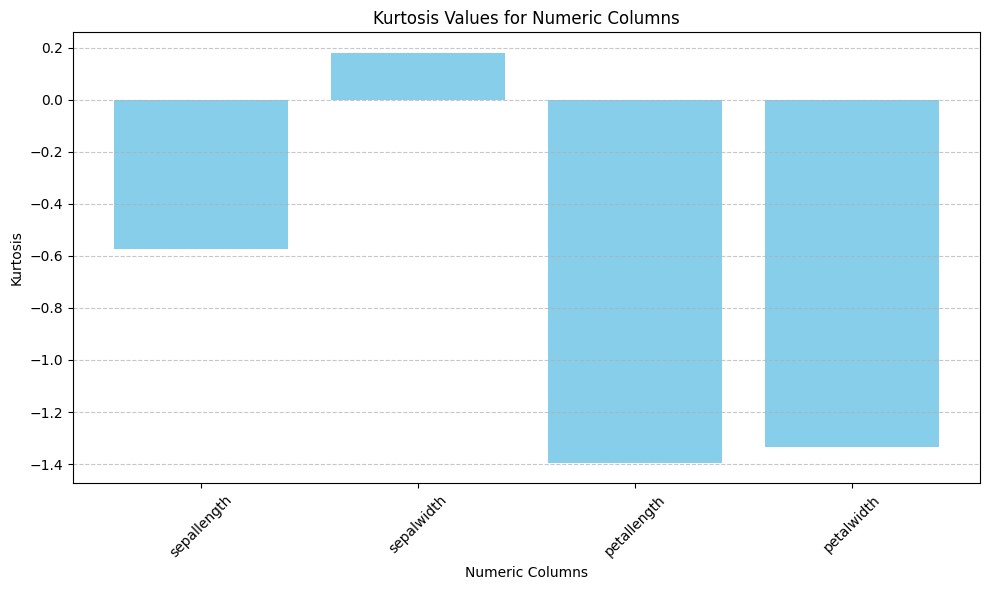

In [137]:
from scipy.stats import kurtosis

# Calculate kurtosis for each numeric column
# Selecting numeric columns
numeric_columns = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']

kurtosis_values = {col: kurtosis(iris_df[col]) for col in numeric_columns}
print("Kurtosis:")
for col, value in kurtosis_values.items():
    print(f"{col}: {value}")


import matplotlib.pyplot as plt

# Extract column names and kurtosis values
columns = list(kurtosis_values.keys())
values = list(kurtosis_values.values())

# Plotting the kurtosis values
plt.figure(figsize=(10, 6))
plt.bar(columns, values, color='skyblue')
plt.title('Kurtosis Values for Numeric Columns')
plt.xlabel('Numeric Columns')
plt.ylabel('Kurtosis')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



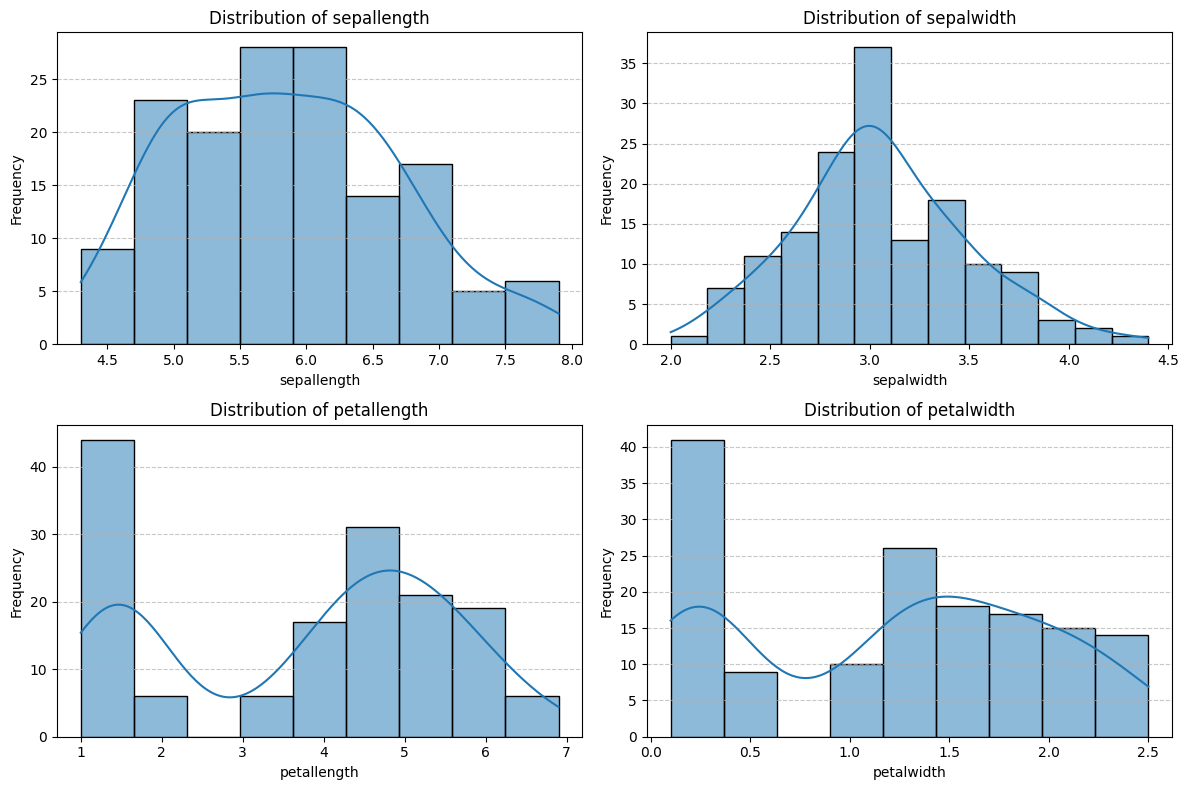

In [136]:
import seaborn as sns

# Plotting distribution plots for each numeric column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns,1):
    plt.subplot(2, 2, i)
    sns.histplot(data=iris_df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**Range**

Range is the difference between the maximum and minimum values in a dataset.
Calculating the range for each numeric column provides a simple measure of the spread or variability of the data.
It helps in understanding the extent of variation present in each feature, providing insights into the overall spread of values and potential outliers.

In [62]:
# Calculate range for each numeric column
range_values = {col: iris_df[col].max() - iris_df[col].min() for col in numeric_columns}
print("\nRange:")
for col, value in range_values.items():
    print(f"{col}: {value}")


Range:
sepallength: 3.6000000000000005
sepalwidth: 2.4000000000000004
petallength: 5.9
petalwidth: 2.4


**Interquartile Range (IQR):**

IQR is the range covered by the middle 50% of the data, calculated as the difference between the third quartile (Q3) and the first quartile (Q1).
Computing IQR helps in assessing the spread of the central portion of the data distribution, providing a robust measure of variability that is less sensitive to outliers compared to the range.
It is particularly useful in identifying the presence of outliers and understanding the spread of the bulk of the data within each feature.

In [65]:
# Calculate interquartile range (IQR) for each numeric column
Q1 = iris_df[numeric_columns].quantile(0.25)
Q3 = iris_df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
print("The IQR of the iris dataset is ", IQR )

The IQR of the iris dataset is  sepallength    1.3
sepalwidth     0.5
petallength    3.5
petalwidth     1.5
dtype: float64


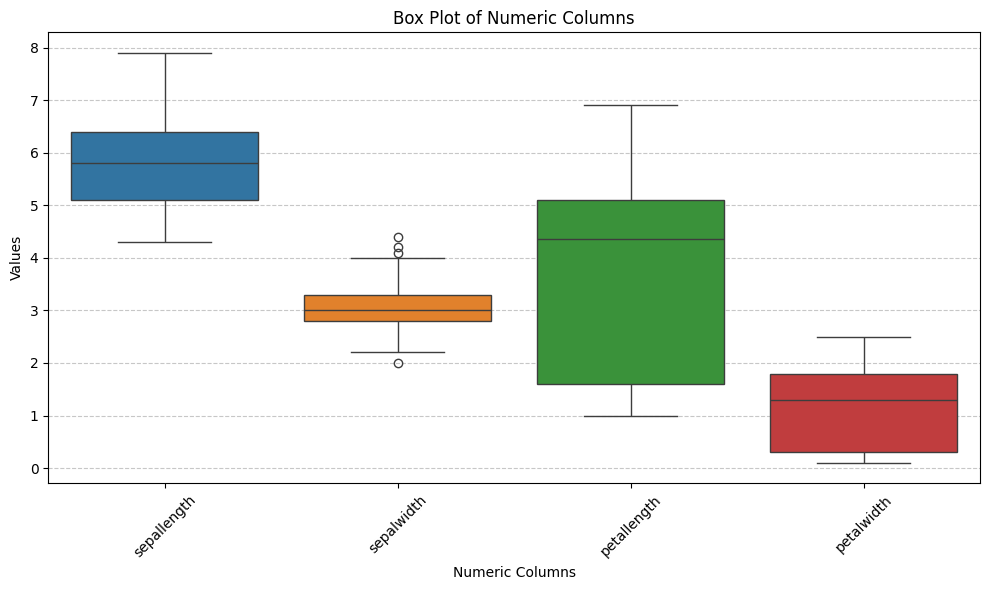

In [66]:
# Plotting box plots for each numeric column
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df[numeric_columns])
plt.title('Box Plot of Numeric Columns')
plt.xlabel('Numeric Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**The correlation coefficient**
measures the strength and direction of the linear relationship between two variables. In the context of the Iris dataset, we can use correlation to understand how the numerical features (such as sepal length, sepal width, petal length, and petal width) are related to each other.

Correlation coefficients range from -1 to 1:
A coefficient of 1 indicates a perfect positive correlation, meaning that as one variable increases, the other variable also increases proportionally.

A coefficient of -1 indicates a perfect negative correlation, meaning that as one variable increases, the other variable decreases proportionally.

A coefficient of 0 indicates no linear correlation between the variables.

<ipython-input-67-9dc1ee2fdec1>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = iris_df.corr()


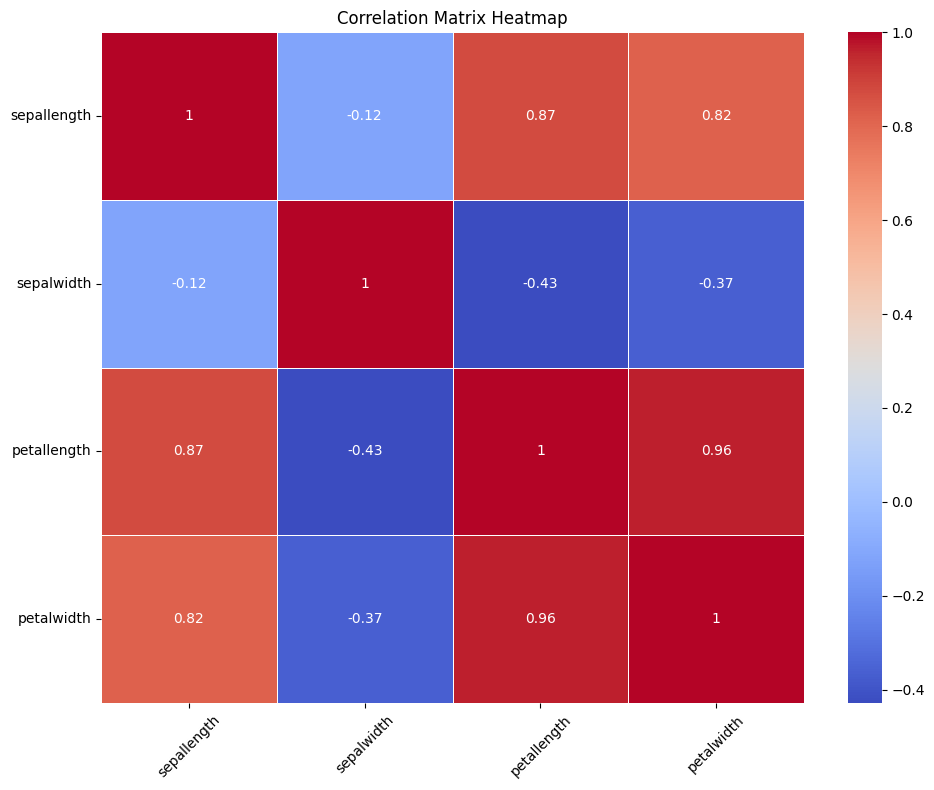

In [67]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = iris_df.corr()

# Plotting the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Normal Distribution:**

Normal distribution, also known as Gaussian distribution, is characterized by a symmetric bell-shaped curve. It is defined by its mean (μ) and standard deviation (σ).
We can visually check if a numeric column follows a normal distribution by plotting a histogram and comparing it to a normal distribution curve.

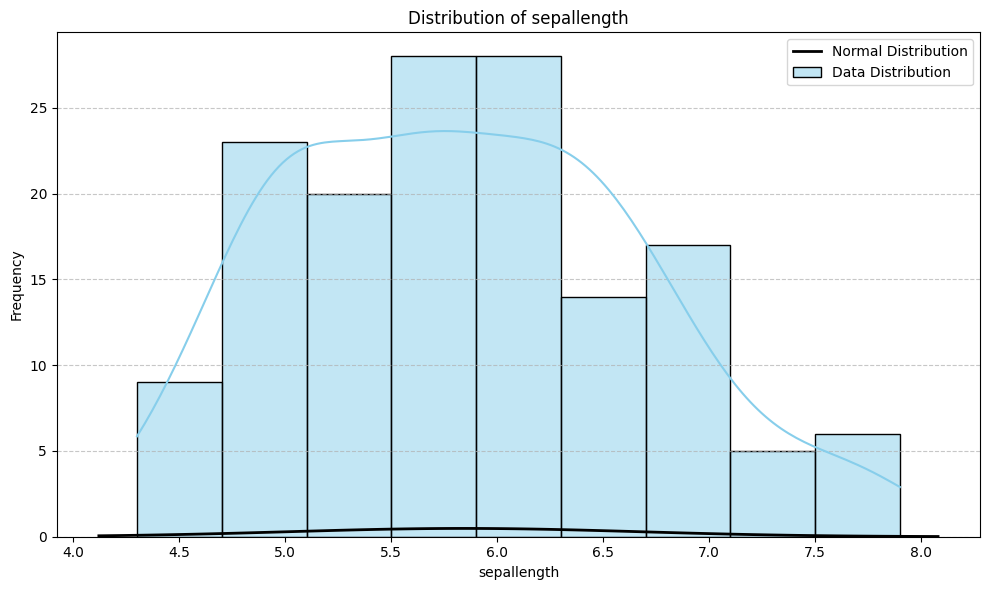

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Selecting a numeric column from the Iris dataset
column_name = 'sepallength'
data = iris_df[column_name]

# Plotting histogram of the selected column
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, color='skyblue', label='Data Distribution')

# Fitting normal distribution curve
mu, std = norm.fit(data)
xmin, xmax = plt.xlim()
x_norm = np.linspace(xmin, xmax, 100)
p_norm = norm.pdf(x_norm, mu, std)
plt.plot(x_norm, p_norm, 'k', linewidth=2, label='Normal Distribution')

plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [76]:
# Drop the 'species' column from the dataframe
data = iris_df.drop(columns=['species'])
data

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


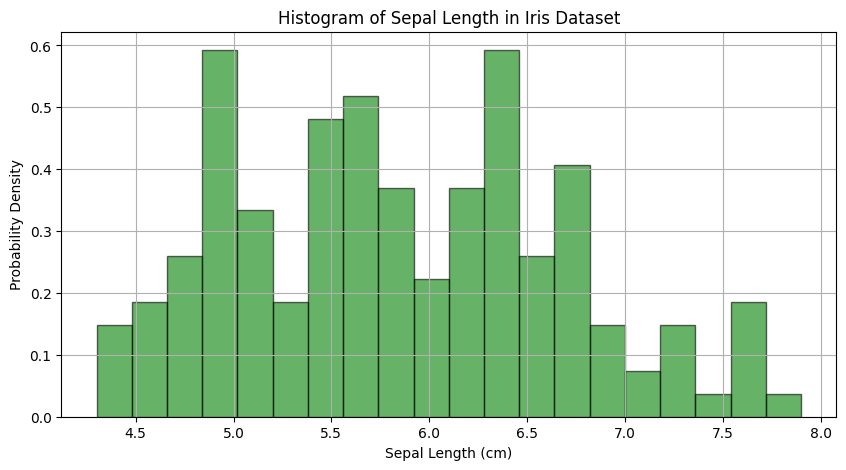

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.figure(figsize=(10, 5))
plt.hist(data['sepallength'], bins=20, density=True, alpha=0.6, color='g', edgecolor='black')
plt.title('Histogram of Sepal Length in Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

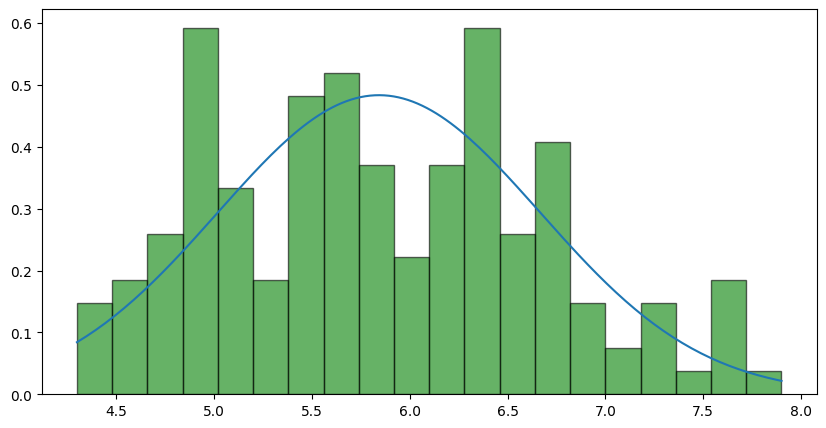

In [94]:
# Generate x values for plotting PDFs
x = np.linspace(min(data['sepallength']), max(data['sepallength']), 150)

# Normal distribution fitting
mu, sigma = stats.norm.fit(data['sepallength'])
pdf_norm = stats.norm.pdf(x, mu, sigma)

plt.figure(figsize=(10, 5))
plt.hist(data['sepallength'], bins=20, density=True, alpha=0.6, color='g', edgecolor='black')
plt.plot(x, pdf_norm,  label='Normal')

**The binomial distribution** is not typically used to model continuous data like sepal length in the Iris dataset, as it's primarily suited for modeling discrete outcomes with a fixed number of trials (e.g., success or failure, heads or tails, etc.)

Example: Applly the binomial distribution to model the number of observations for each species in a fixed number of trials (10 in this case).

In [153]:
# Filter the DataFrame to contain only the chosen species
from scipy.stats import binom
species_to_analyze = 'setosa'
species_df = iris_df[iris_df['species'] == species_to_analyze]

# Calculate the number of occurrences of the chosen species
species_count = len(species_df)

# Number of samples (trials)
num_samples = 10

In [158]:
# Calculate the probability of observing the species in a single sample
probability_species = species_count / len(iris_df)

# Initialize the binomial distribution
binom_distribution = binom(num_samples, probability_species)


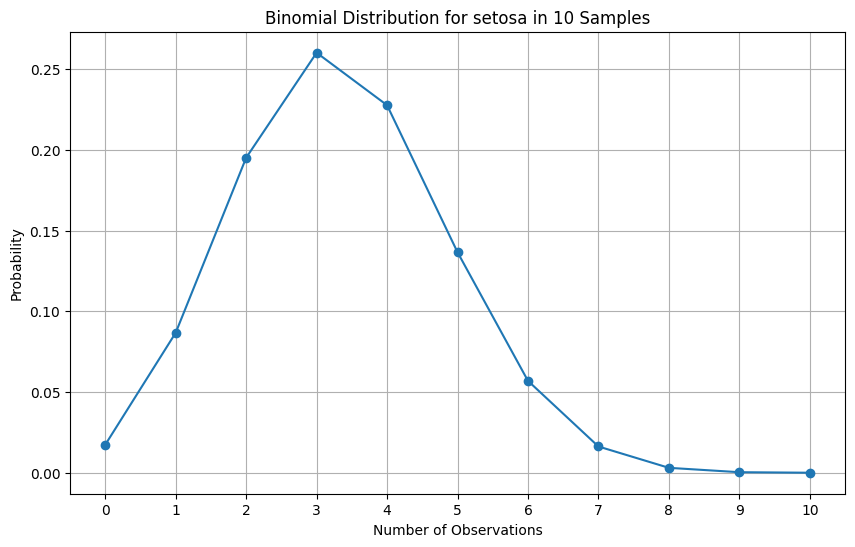

In [160]:
# Possible number of occurrences (0 to num_samples)
k_values = np.arange(num_samples + 1)

# Calculate the PMF for the binomial distribution
binom_pmf_values = binom_distribution.pmf(k_values)

# Plot the binomial distribution
plt.figure(figsize=(10, 6))
plt.plot(k_values, binom_pmf_values, marker='o', linestyle='-')
plt.title(f'Binomial Distribution for {species_to_analyze} in 10 Samples')
plt.xlabel('Number of Observations')
plt.ylabel('Probability')
plt.xticks(k_values)
plt.grid(True)
plt.show()

**The Poisson distribution** is commonly used to model the number of events occurring in a fixed interval of time or space, given the average rate of occurrence. In the context of the Iris dataset, we can use the Poisson distribution to model the number of occurrences of each species in a fixed number of samples.

To do this perform the following steps:

1. Calculate Average Rate: We'll calculate the average rate of occurrence for each species in the Iris dataset.

2. Apply the Poisson Distribution: We'll use the Poisson distribution to model the number of occurrences for each species in a fixed number of samples.

3. Plot the Probability Mass Function (PMF): We'll plot the PMF of the Poisson distribution for each species to visualize the probabilities of observing different numbers of occurrences.



In [125]:
# Calculate the number of occurrences of each species
species_counts = iris_df['species'].value_counts()

# Number of samples (trials)
num_samples = 10

species_counts

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [126]:
# Initialize an empty dictionary to store Poisson distributions for each species
from scipy.stats import poisson
poisson_distributions = {}

# Apply the Poisson distribution for each species
for species, count in species_counts.items():
    rate = count / num_samples  # Average rate of occurrence per sample
    poisson_distribution = poisson(mu=rate)
    poisson_distributions[species] = poisson_distribution


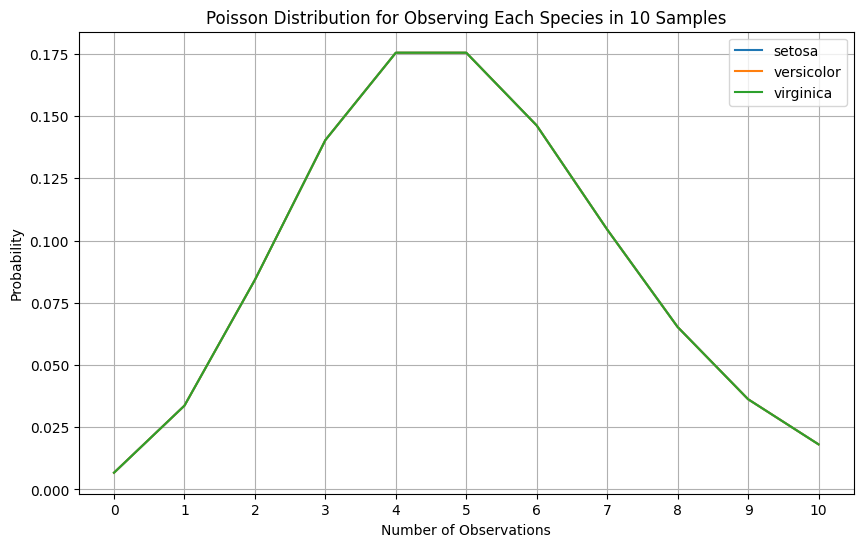

In [129]:
# Possible number of occurrences (0 to num_samples)
k_values = np.arange(num_samples + 1)

# Plot the Poisson distributions for each species
plt.figure(figsize=(10, 6))
for species, poisson_distribution in poisson_distributions.items():
    pmf_values = poisson_distribution.pmf(k_values)
    plt.plot(k_values, pmf_values, label=species)

plt.title('Poisson Distribution for Observing Each Species in 10 Samples')
plt.xlabel('Number of Observations')
plt.ylabel('Probability')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()


**In summary,** the Binomial distribution is used to model the occurrence of a specific species in each individual sample, while the Poisson distribution is used to model the overall occurrence of each species across all samples. The choice between the two distributions depends on the nature of the data and the specific research question or hypothesis being investigated.

#Note:
For question number 3 visualise your data with large sample size, you need to apply the central limit theorem.

Example for binomial distribution

In [138]:
n=10 # number of trail
p=0.5 # probabilty of coin turns head
s=np.random.binomial(n,p,100)
s

array([6, 9, 7, 2, 3, 4, 3, 8, 6, 7, 4, 5, 5, 2, 9, 7, 5, 6, 5, 4, 5, 8,
       6, 6, 2, 7, 5, 9, 4, 6, 7, 7, 5, 3, 7, 5, 6, 3, 1, 6, 4, 7, 3, 5,
       5, 7, 5, 5, 4, 7, 3, 4, 5, 4, 4, 5, 6, 3, 5, 6, 5, 7, 7, 4, 4, 4,
       6, 3, 7, 8, 6, 6, 5, 3, 7, 6, 4, 4, 6, 5, 5, 3, 5, 3, 6, 4, 7, 2,
       4, 5, 6, 5, 3, 6, 6, 5, 5, 4, 6, 3])

Example2: A real world example. A company drills 9 wild-cat oil exploration wells, each with an estimated probability of success of 0.1. All nine wells fail. What is the probability of that happening?


In [149]:
sum(np.random.binomial(9, 0.1, 20000) == 0) / 20000


0.39285

In [150]:
np.random.binomial(9, 0.1, 20000)

array([1, 0, 1, ..., 1, 0, 2])